In [26]:
# !pip install --upgrade scikit-learn==0.22
#!pip install graphviz
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

### Import library yang diperlukan

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn import tree
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline

# from sklearn.externals.six import StringIO
# import pydotplus
# import matplotlib.image as mpimg
# from sklearn import tree

## ========================================================================

### Memanggil, memeriksa, dan memahami data

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
print(df.info(),'\n')
print('Memeriksa total missing value data:\n',df.isnull().sum(),'\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

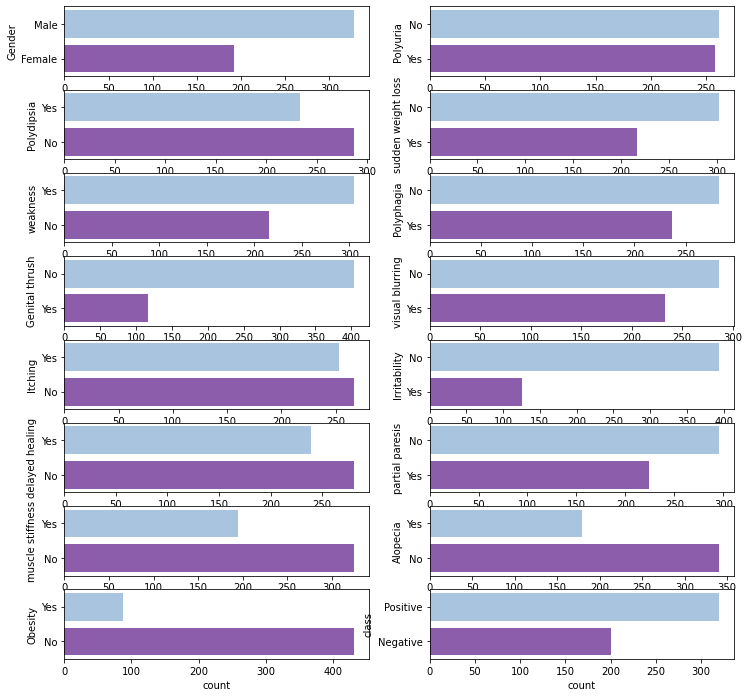

In [5]:
f,ax = plt.subplots(8,2, figsize=(12,12))
for i, subplot, in zip(df.columns[1:17], ax.flatten()):
    sns.countplot(y=df[i],
                  ax=subplot,
                  palette='BuPu',
                  saturation=1)

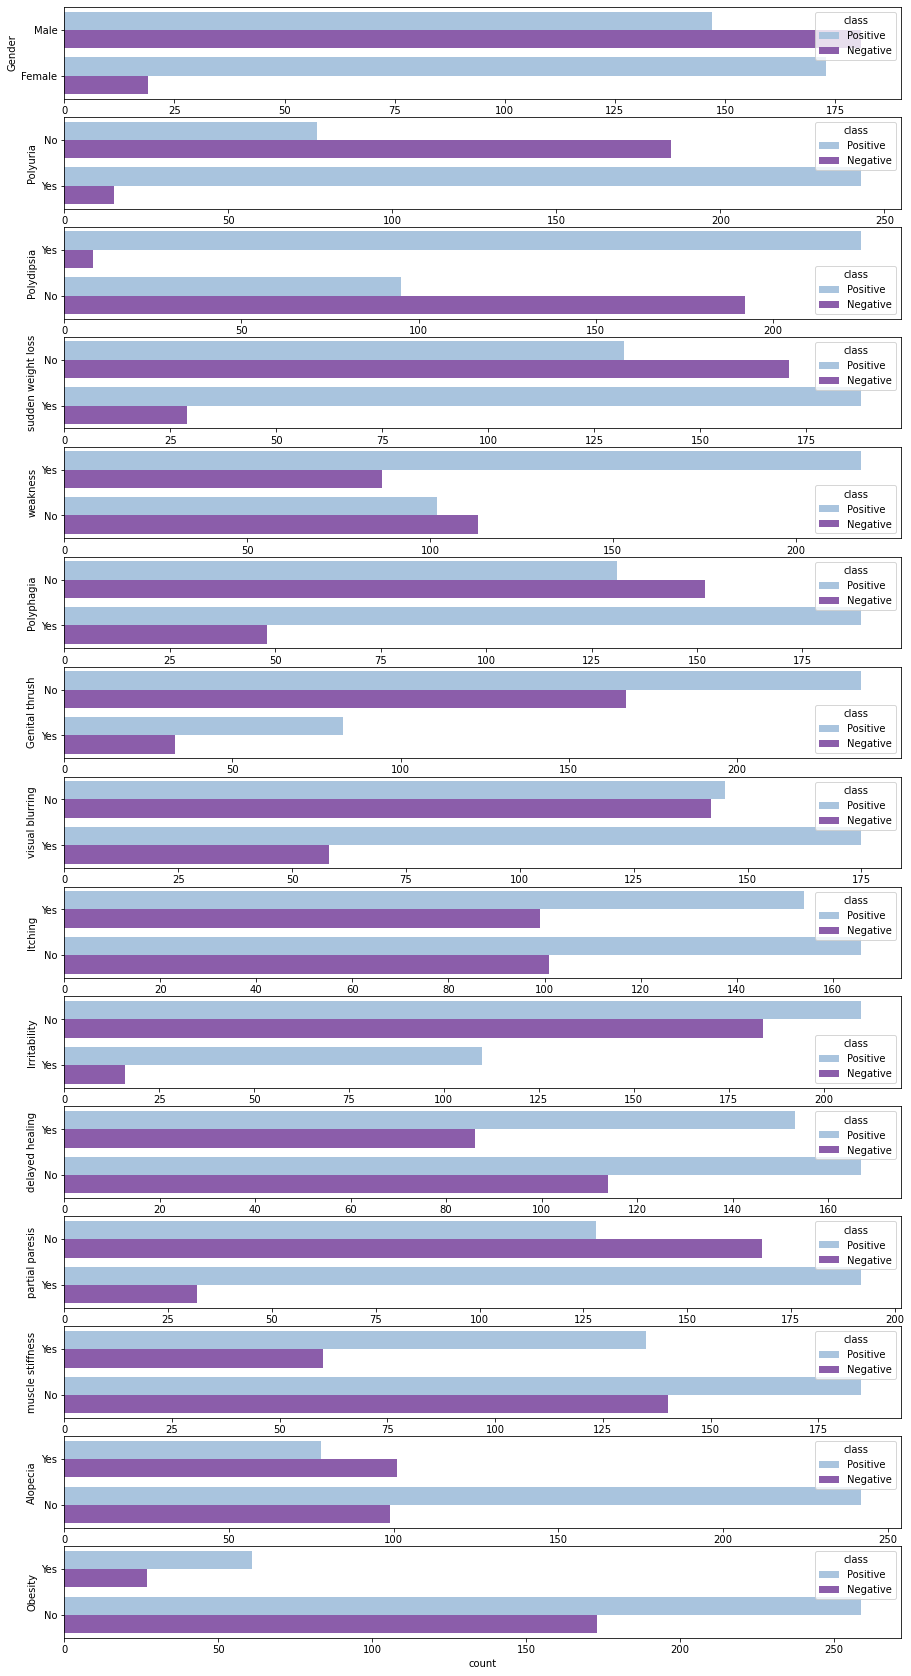

In [6]:
f,ax = plt.subplots(15,1, figsize=(15,30))
for i, subplot in zip(df.columns[1:16], ax.flatten()):
    sns.countplot(y=df[i],
                  hue=df['class'],
                  ax=subplot,
                  palette='BuPu',
                  saturation=1)

In [8]:
df['ageBins'] = pd.cut(x=df['Age'],
                       bins=[20,29,39,49,59,69,79,89,99])
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,ageBins
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,"(39, 49]"
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,"(49, 59]"
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,"(39, 49]"
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,"(39, 49]"
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,"(59, 69]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive,"(29, 39]"
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive,"(39, 49]"
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive,"(49, 59]"
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative,"(29, 39]"


In [9]:
df['ageBins'].unique()

[(39.0, 49.0], (49.0, 59.0], (59.0, 69.0], (69.0, 79.0], (29.0, 39.0], (20.0, 29.0], (79.0, 89.0], (89.0, 99.0], NaN]
Categories (8, interval[int64]): [(20, 29] < (29, 39] < (39, 49] < (49, 59] < (59, 69] < (69, 79] < (79, 89] < (89, 99]]

In [10]:
df['ageDecade'] = pd.cut(x=df['Age'], 
                         bins=[20,29,39,49,59,69,79,89,99], 
                         labels=['20-an','30-an', '40-an', '50-an','60-an','70-an','80-an','90-an'])
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,ageBins,ageDecade
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,"(39, 49]",40-an
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,"(49, 59]",50-an
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,"(39, 49]",40-an
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,"(39, 49]",40-an
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,"(59, 69]",60-an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive,"(29, 39]",30-an
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive,"(39, 49]",40-an
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive,"(49, 59]",50-an
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative,"(29, 39]",30-an


In [11]:
df.groupby('ageDecade')['class'].value_counts()

ageDecade  class   
20-an      Negative    12
           Positive     7
30-an      Positive    77
           Negative    47
40-an      Positive    88
           Negative    63
50-an      Positive    81
           Negative    49
60-an      Positive    56
           Negative    20
70-an      Negative     9
           Positive     6
80-an      Positive     2
90-an      Positive     2
Name: class, dtype: int64

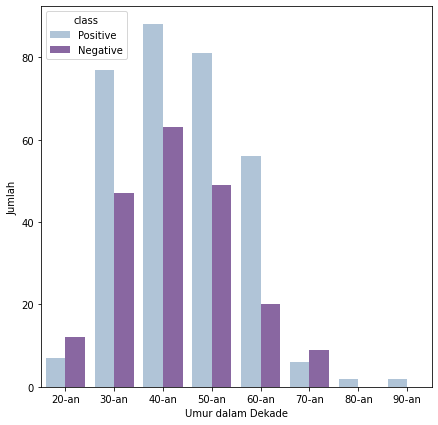

In [12]:
f,ax = plt.subplots(figsize=(7,7))
ax = sns.countplot(x='ageDecade', 
                   hue='class', 
                   data=df, 
                   palette='BuPu')
plt.ylabel('Jumlah')
plt.xlabel('Umur dalam Dekade')
plt.show()

## ========================================================================

### Distribusi nilai dalam dataframe ke bentuk matriks (x)

In [13]:
# X adalah list
X = ['Age','Gender','Polyuria','Polydipsia','sudden weight loss',
     'weakness','Polyphagia','Genital thrush','visual blurring',
     'Itching','Irritability','delayed healing','partial paresis',
     'muscle stiffness','Alopecia','Obesity']

x = df[X].values
x[0:5]

array([[40, 'Male', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
       [58, 'Male', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
        'No', 'No', 'Yes', 'No', 'Yes', 'No'],
       [41, 'Male', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
       [45, 'Male', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
        'No', 'Yes', 'No', 'No', 'No', 'No'],
       [60, 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']], dtype=object)

## ========================================================================

### Mengubah data kategorik menjadi data numerik

In [14]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

def convertToBool(column_name):
    df[column_name] = df[column_name].map({'Yes':1,'No':0})

listColName = ['Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia',
               'Genital thrush','visual blurring','Itching','Irritability','delayed healing',
               'partial paresis','muscle stiffness','Alopecia','Obesity']
for i in listColName:
    convertToBool(i)

df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,ageBins,ageDecade
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive,"(39, 49]",40-an
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive,"(49, 59]",50-an
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive,"(39, 49]",40-an
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive,"(39, 49]",40-an
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive,"(59, 69]",60-an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive,"(29, 39]",30-an
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive,"(39, 49]",40-an
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive,"(49, 59]",50-an
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative,"(29, 39]",30-an


In [15]:
dfFinal = df
dfFinal = dfFinal.drop(['ageBins','ageDecade'], axis=1)
dfFinal['class'] = dfFinal['class'].map({'Positive':1,'Negative':0})
dfFinal

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [16]:
dfFinal.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


## ========================================================================

### Distribusi nilai dalam dataframe ke bentuk matriks dan membagi data menjadi data train dan test

In [17]:
# Putting feature variable to X
X = dfFinal.drop(['class'], axis=1)

# Putting response variable to y
y = dfFinal['class']

In [18]:
# membagi data menjadi 80 persen data train dan 20 persen data test
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=100)

print("Number transactions X_train dataset: ", X_trainset.shape)
print("Number transactions y_train dataset: ", y_trainset.shape)
print("Number transactions X_test dataset: ", X_testset.shape)
print("Number transactions y_test dataset: ", y_testset.shape)

Number transactions X_train dataset:  (416, 16)
Number transactions y_train dataset:  (416,)
Number transactions X_test dataset:  (104, 16)
Number transactions y_test dataset:  (104,)


## ========================================================================

### Membuat model

In [19]:
dfFinalTree = DecisionTreeClassifier(criterion='entropy')
dfFinalTree

DecisionTreeClassifier(criterion='entropy')

## ========================================================================

### Mencoba model ke dalam data train

In [20]:
dfFinalTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [21]:
dfFinalPredTrain = dfFinalTree.predict(X_trainset)
print(dfFinalPredTrain[0:5])
print(y_trainset[0:5])
print("\nDecisionTree's Accuracy:", metrics.accuracy_score(y_trainset, dfFinalPredTrain))
print('\n',y_trainset.value_counts())

[1 1 0 1 1]
459    1
7      1
410    0
152    1
424    1
Name: class, dtype: int64

DecisionTree's Accuracy: 1.0

 1    250
0    166
Name: class, dtype: int64


### k-fold cross validation

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dfFinalTree, X_trainset, y_trainset, cv=5)
scores.mean()

0.9566551921973607

## ========================================================================

### Melakukan prediksi terhadap data test

In [23]:
dfFinalPred = dfFinalTree.predict(X_testset)
print(dfFinalPred[0:5])
print(y_testset[0:5])
print("\nDecisionTree's Accuracy:", metrics.accuracy_score(y_testset, dfFinalPred))
print(y_testset.value_counts())

[1 0 1 1 1]
304    1
332    0
78     1
380    1
515    1
Name: class, dtype: int64

DecisionTree's Accuracy: 0.9711538461538461
1    70
0    34
Name: class, dtype: int64


## ========================================================================

### Visualisasi data

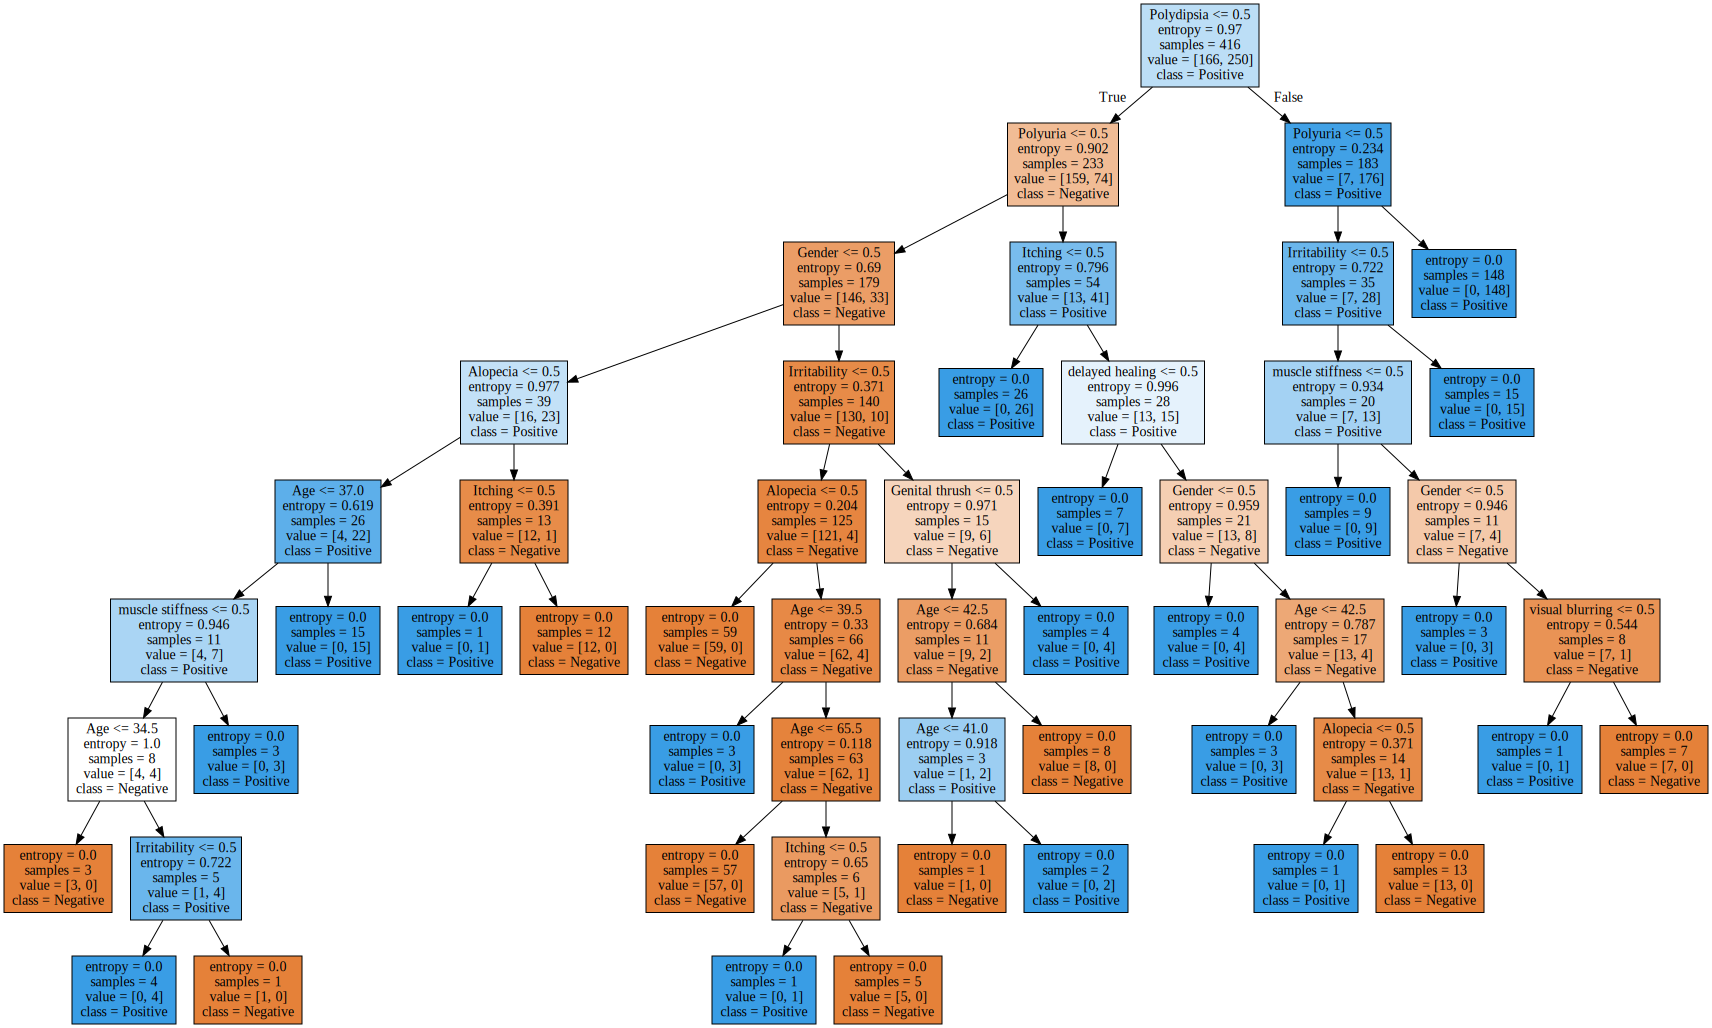

In [28]:
listColumns = ['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia',
               'Genital thrush','visual blurring','Itching','Irritability','delayed healing',
               'partial paresis','muscle stiffness','Alopecia','Obesity']
# DOT data
dfFinalDot = tree.export_graphviz(dfFinalTree, out_file=None, feature_names=listColumns, class_names=['Negative', 'Positive'],filled=True)

# Draw graph
graph = graphviz.Source(dfFinalDot, format="png") 
graph

In [29]:
# saving decision tree graph

graph.render("decision_tree_graphivz_final")

'decision_tree_graphivz_final.png'

## ========================================================================

In [30]:
# contoh =[[22,1,0,1,0,1,0,1,1,1,0,0,0,0,0,0]]
# dfTree.predict(contoh)

# contoh2 = [[22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
# dfTree.predict(contoh2)

## ========================================================================

### Demo prediksi diabetes pada pasien secara langsung

In [32]:
list=[]
for i in range(len(listColumns)):
    if i==0:
        add=int(input('Berapakah Umur Anda? '))
        list.append(add)
    if i==1:
        add1=int(input('Jenis Kelamin:\n [0] Wanita \n [1] Pria \n'))
        list.append(add1)
    if i==2:
        add2=int(input('Apakah Anda mengalami Poliuria? [Polyuria] \n [0] Tidak \n [1] Ya \n'))
        list.append(add2)
    if i==3:
        add3=int(input('Apakah Anda mengalami Polidipsia? [Polydipsia] \n [0] Tidak \n [1] Ya \n'))
        list.append(add3)
    if i==4:
        add4=int(input('Apakah Anda mengalami turun berat badan dalam waktu singkat? [Sudden Weight Loss] \n [0] Tidak \n [1] Ya \n'))
        list.append(add4)
    if i==5:
        add5=int(input('Apakah Anda merasa lemas? [Weakness] \n [0] Tidak \n [1] Ya \n'))
        list.append(add5)
    if i==6:
        add6=int(input('Apakah Anda mengalami Poliphagia? [Polyphagia] \n [0] Tidak \n [1] Ya \n'))
        list.append(add6)
    if i==7:
        add7=int(input('Apakah Anda mengalami sariawan pada kelamin? [Genital Thrush] \n [0] Tidak \n [1] Ya \n'))
        list.append(add7)
    if i==8:
        add8=int(input('Apakah Anda mengalami rabun? [Visul Blurring] \n [0] Tidak \n [1] Ya \n'))
        list.append(add8)
    if i==9:
        add9=int(input('Apakah Anda merasa gatal-gatal? [Itching] \n [0] Tidak \n [1] Ya \n'))
        list.append(add9)
    if i==10:
        add10=int(input('Apakah Anda mudah marah? [Irritability] \n [0] Tidak \n [1] Ya \n'))
        list.append(add10)
    if i==11:
        add11=int(input('Apakah luka yang Anda alami lama sembuh? [Delayed Healing] \n [0] Tidak \n [1] Ya \n'))
        list.append(add11)
    if i==12:
        add12=int(input('Apakah Anda mengalami penyakit paresis parsial? [Partial Paresis] \n [0] Tidak \n [1] Ya \n'))
        list.append(add12)
    if i==13:
        add13=int(input('Apakah Anda mengalami kaku pada otot? [Muscle Stiffness] \n [0] Tidak \n [1] Ya \n'))
        list.append(add13)
    if i==14:
        add14=int(input('Apakah Anda mengalami Alopecia? [Alopecia] \n [0] Tidak \n [1] Ya \n'))
        list.append(add14)
    if i==15:
        add15=int(input('Apakah Anda mengalami obesitas? [Obesity] \n [0] Tidak \n [1] Ya \n'))
        list.append(add15)
a = dfFinalTree.predict([list])
print('\n',a)
if a == 0:
    print('Anda diprediksi: Negatif Diabetes')
    print('Ingat untuk selalu jaga kesehatan.')
else:
    print('Anda diprediksi: Positif Diabetes')
    print('Anda disarankan pergi ke dokter')

Berapakah Umur Anda? 20
Jenis Kelamin:
 [0] Wanita 
 [1] Pria 
0
Apakah Anda mengalami Poliuria? [Polyuria] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengalami Polidipsia? [Polydipsia] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengalami turun berat badan dalam waktu singkat? [Sudden Weight Loss] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda merasa lemas? [Weakness] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengalami Poliphagia? [Polyphagia] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengalami sariawan pada kelamin? [Genital Thrush] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengalami rabun? [Visul Blurring] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda merasa gatal-gatal? [Itching] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mudah marah? [Irritability] 
 [0] Tidak 
 [1] Ya 
0
Apakah luka yang Anda alami lama sembuh? [Delayed Healing] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengalami penyakit paresis parsial? [Partial Paresis] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengalami kaku pada otot? [Muscle Stiffness] 
 [0] Tidak 
 [1] Ya 
0
Apakah Anda mengala

## ========================================================================